#### Question2:

in this question we want to predict the price of house with a linear model, using MSE error function and GD.
the only differnce is that we will use all feauters givven in the file.
so we have 18 fetures and as explaind in past question we have a linear model.
we set the learning rate alpha to 0.001
the reading and storing data from file is similar to past question
the initialization is random for each teta.
at the end we want to calculate the best teta that can predict the price with minimum error.

onr other important thing: in this question we used feature scaling

In [1]:
import csv
import random
teta=[]
for i in range(0,19):
    teta.append(random.random())
temp=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
mse_list=[]
level=[]
alpha=0.001
tmp=[]
theList_y=[]
x=[]
with open('kc_house_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            theList_y.append(float(row[2]))
            for i in range(18):
                tmp.append(float(row[i+3]))
            x.append(tmp)
            tmp=[]
            line_count += 1
            
    print(line_count)

m=line_count-1

21614


this function calclulates the average of the list of one feature for all training data. we will use it for scaling.

In [2]:
def avg_fun(my_list):
    return sum(my_list)/len(my_list)

this part performs the feature scaling.it is used so that fetures with diffrent ranges scale to each other.
the formula for each feature is :
x=(x-avg)/range
range=max(all x)-min(all x)

In [3]:
for j in range(18):
    tmp=[]
    for k in range(m):
        tmp.append(x[k][j])
    
    avg=avg_fun(tmp)
    my_range=max(tmp)-min(tmp)


    for i in range(m):
        x[i][j]=(x[i][j]-avg)/my_range



h_functions explaind in past question

In [4]:
def h_function(i):
    h=0
    for j in range(18):
        h+=teta[j+1]*x[i][j]
    return h+teta[0]

teta_derivation explaind in past question
there is only one diffrence about it in this question, for each itteration, when we want to calculate the derivations, we also calculate the MSE function error and save it in mse_list so in final part we can draw the diagram.

In [5]:
def teta_derivation(mode,mse_list):
    sigma=0
    MSE=0;
    if(mode==0):
        for i in range(m):
            e=(h_function(i)-theList_y[i])
            sigma+=e
            MSE+=e*e
            
   
    else:
        for i in range(m):
            sigma+=((h_function(i)-theList_y[i])*x[i][mode-1])
    
    if(mode==0):
        mse_list.append((1.0/(2*m))*MSE)
    
    return sigma

update function explained in past question

In [6]:
def update(mode):
        return teta[mode]-(alpha*(1.0/m)*teta_derivation(mode,mse_list))


    

this is our gradiant descent function that performs update for 5000 iterations to update teta values for best results until convergence.
more explained in last question.
as explained before, in this question we save MSE error per each itteration, so I have a list called "level", and I save the number of iteration levels in it, in next parts I use it to draw the diagam. 

In [12]:
index=0
for i in range(5000):
    for j in range (19):
        temp[j]=update(j)  


    j=0
    for j in range (19):
        teta[j]=temp[j]
    
    level.append(index)
    index+=1
        




you can see the final results that GD calculated : 

In [13]:
j=0
print("------------------")
for j in range (19):
    print(teta[j])
print("------------------")

------------------
536494.290701
13918.6302597
80255.7549339
79405.6659477
3673.95914015
80045.6953853
38480.6862088
121179.629312
14344.300716
105981.046471
88781.9832287
50297.3929357
9218.84072309
40262.3390679
-20100.1628954
110380.828988
767.428892742
111048.631336
4114.91733774
------------------


here we draw the diagram of MSE error function per each level, using mse_list and level list that we saved before.
we can see that the error decreases per each level, at first it has a faster rate and by each iteration, the rate of decreasing slows down.

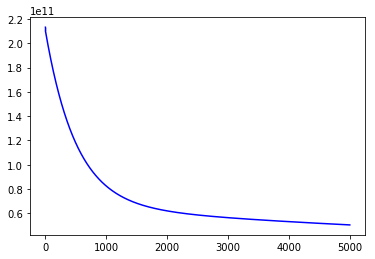

In [14]:
import matplotlib.pyplot as plt
import numpy as np  

plt.plot(level,mse_list,color='blue')

plt.show()